# # Exploración de Datos (EDA)
# Revisaremos esquemas, valores faltantes, estadísticos básicos, distribuciones, correlaciones y un análisis en profundidad de nuestra variable objetivo `realSum`.

In [17]:
# %% 0. Asegurar cwd en la raíz del proyecto
import os

# opción 1: con magia de Jupyter
# %cd C:/Users/George/Documents/GitHub/ML-Models-UFM-2025-Airbnb-Pricing-competition/airbnb-price-determinant

# opción 2: con os.chdir
os.chdir(r"C:\Users\George\Documents\GitHub\ML-Models-UFM-2025-Airbnb-Pricing-competition\airbnb-price-determinant")

print("Nuevo cwd:", os.getcwd())


Nuevo cwd: C:\Users\George\Documents\GitHub\ML-Models-UFM-2025-Airbnb-Pricing-competition\airbnb-price-determinant


In [23]:
# 01_EDA.ipynb

# %%  
import os  
print("Directorio actual de trabajo:", os.getcwd())

# %% 1. Carga de datos
import pandas as pd

train = pd.read_csv("data/01_raw/Train.csv", low_memory=False)
test  = pd.read_csv("data/01_raw/Test.csv",  low_memory=False)

# %% 2. Mostrar primeros registros
from IPython.display import display

print("Primeras 5 filas de TRAIN:")
display(train.head())

print("\nPrimeras 5 filas de TEST:")
display(test.head())


Directorio actual de trabajo: C:\Users\George\Documents\GitHub\ML-Models-UFM-2025-Airbnb-Pricing-competition\airbnb-price-determinant
Primeras 5 filas de TRAIN:


,id,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,city,day_type
0,1,210.3658537,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,91,0,0.541021778,0.42791926,-9.13395,38.71038,lisbon,weekday
1,2,176.1817209,Private room,FALSE,TRUE,2,FALSE,1,0,9,89,1,3.032839151,0.343492056,2.14165,41.37011,barcelona,weekday
2,3,142.0541405,Private room,FALSE,TRUE,2,TRUE,0,0,10,98,1,11.90971188,6.710908979,0.00475,51.44025,london,weekend
3,4,428.7445242,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,9,94,0,4.158389765,0.145570338,2.30179,48.87297,paris,weekend
4,5,220.2798022,Entire home/apt,FALSE,FALSE,6,TRUE,0,1,10,93,2,1.302189968,0.369474779,23.72468,37.96746,athens,weekend



Primeras 5 filas de TEST:


,id,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,city,day_type
0,36196,Entire home/apt,False,False,2,False,0,0,10,98,1,5.216136,0.152300,2.28512,48.87109,paris,weekday
1,36197,Private room,False,True,4,True,0,1,10,100,2,2.422495,0.259421,2.32800,48.87100,paris,weekday
2,36198,Entire home/apt,False,False,4,True,0,0,9,94,2,1.738184,0.377649,4.89285,52.35761,amsterdam,weekday
3,36199,Private room,False,True,4,True,1,0,10,97,1,1.351006,0.572999,-9.14402,38.72405,lisbon,weekend
4,36200,Entire home/apt,False,False,2,False,1,0,8,80,0,3.655290,0.318106,-0.08255,51.52542,london,weekend


# ## 2. Estructura y valores faltantes

In [4]:
# %% 2. Esquema, dtypes y valores faltantes
# Formato resumen de shapes
print(f"Train shape: {train.shape}   Test shape: {test.shape}\n")

# Tipos de datos
print("→ Tipos de datos (Train)")
display(train.dtypes.to_frame("dtype"))

print("\n→ Tipos de datos (Test)")
display(test.dtypes.to_frame("dtype"))

# Valores faltantes
print("\n→ Valores faltantes (Train)")
display(train.isna().sum().to_frame("missing"))

print("\n→ Valores faltantes (Test)")
display(test.isna().sum().to_frame("missing"))

Train shape: (36195, 18)   Test shape: (15513, 17)

→ Tipos de datos (Train)


,dtype
id,int64
realSum,object
room_type,object
room_shared,object
room_private,object
person_capacity,object
host_is_superhost,object
multi,object
biz,object
cleanliness_rating,object



→ Tipos de datos (Test)


,dtype
id,int64
room_type,object
room_shared,bool
room_private,bool
person_capacity,int64
host_is_superhost,bool
multi,int64
biz,int64
cleanliness_rating,int64
guest_satisfaction_overall,int64



→ Valores faltantes (Train)


,missing
id,0
realSum,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0



→ Valores faltantes (Test)


,missing
id,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0
guest_satisfaction_overall,0


In [5]:
# %% 2.1 Corrección conversión de tipos en train para igualar a test
# Booleanas (extensión pandas BooleanDtype)
bool_cols = ["room_shared", "room_private", "host_is_superhost"]
for col in bool_cols:
    train[col] = (
        train[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"true": True, "false": False})
        .astype("boolean")
    )

# Enteras (Int64 para permitir NA)
int_cols = [
    "person_capacity", "multi", "biz",
    "cleanliness_rating", "guest_satisfaction_overall", "bedrooms"
]
for col in int_cols:
    train[col] = pd.to_numeric(train[col], errors="coerce").astype("Int64")

# Continuas (floats), incluyendo la variable objetivo realSum
float_cols = ["dist", "metro_dist", "lng", "lat", "realSum"]
for col in float_cols:
    train[col] = pd.to_numeric(train[col], errors="coerce")

# Verificación rápida de los nuevos dtypes
print("→ Nuevos tipos en TRAIN tras corrección:")
display(train.dtypes.to_frame("dtype"))


→ Nuevos tipos en TRAIN tras corrección:


,dtype
id,int64
realSum,float64
room_type,object
room_shared,boolean
room_private,boolean
person_capacity,Int64
host_is_superhost,boolean
multi,Int64
biz,Int64
cleanliness_rating,Int64


# ## 3. Estadísticos descriptivos básicos

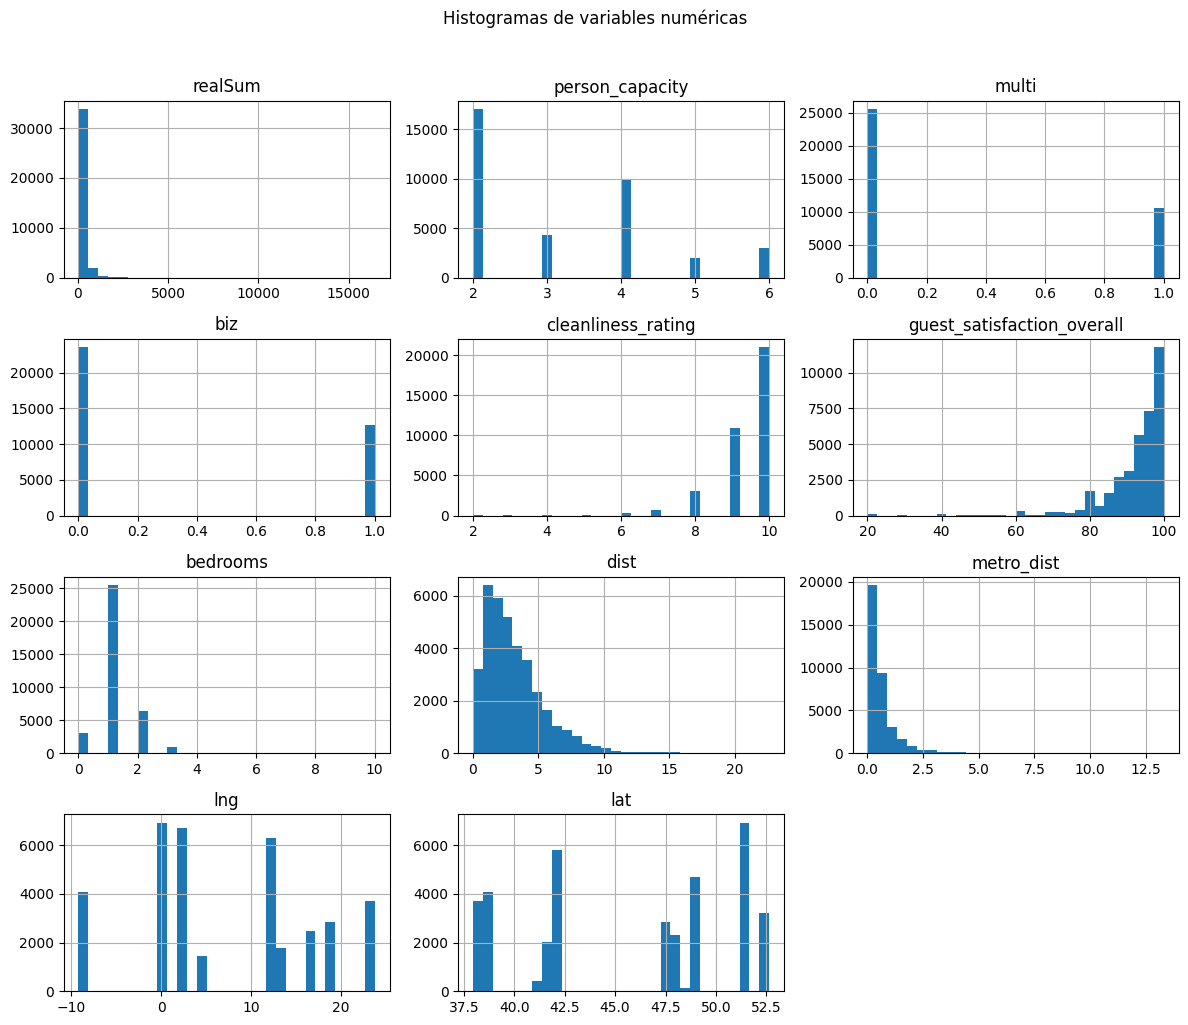

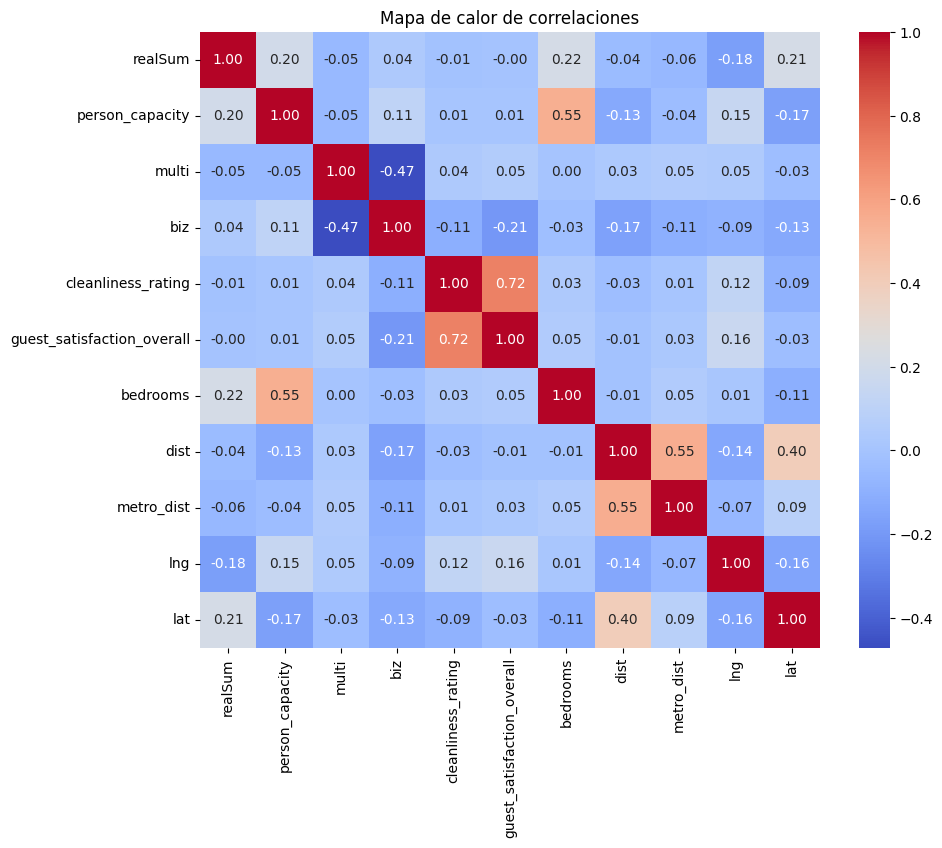

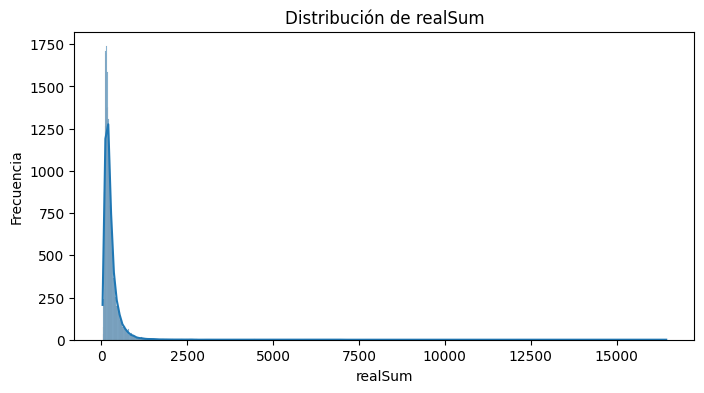

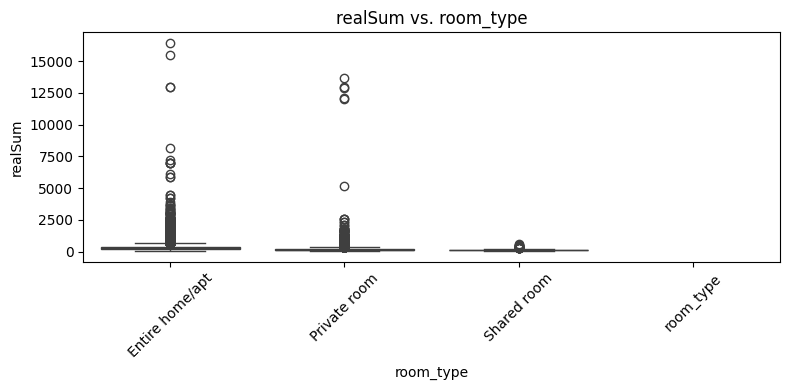

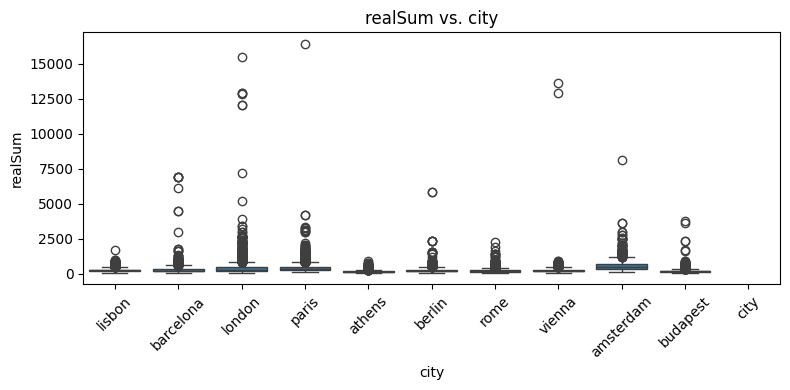

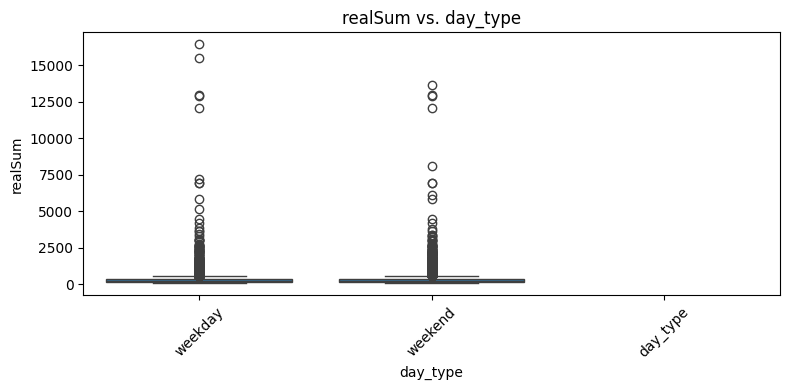

In [6]:
# %% 3. Distribuciones univariantes, correlaciones y análisis de realSum

import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Histogramas de variables numéricas (sin 'id')
num_cols = (
    train.select_dtypes(include=["int64", "Int64", "float64"])
         .columns
         .drop("id")
)
train[num_cols].hist(bins=30, figsize=(12, 10))
plt.suptitle("Histogramas de variables numéricas", y=1.02)
plt.tight_layout()
plt.show()

# 3.2 Mapa de calor de correlaciones
corr = train[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

# 3.3 Distribución de la variable objetivo realSum
plt.figure(figsize=(8, 4))
sns.histplot(train["realSum"], kde=True)
plt.title("Distribución de realSum")
plt.xlabel("realSum")
plt.ylabel("Frecuencia")
plt.show()

# 3.4 Boxplots de realSum vs. variables categóricas clave
for cat in ["room_type", "city", "day_type"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cat, y="realSum", data=train)
    plt.title(f"realSum vs. {cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ## 4. Distribuciones univariantes

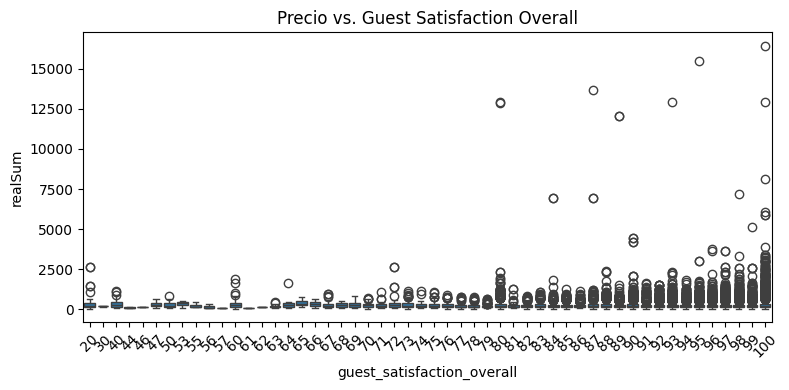

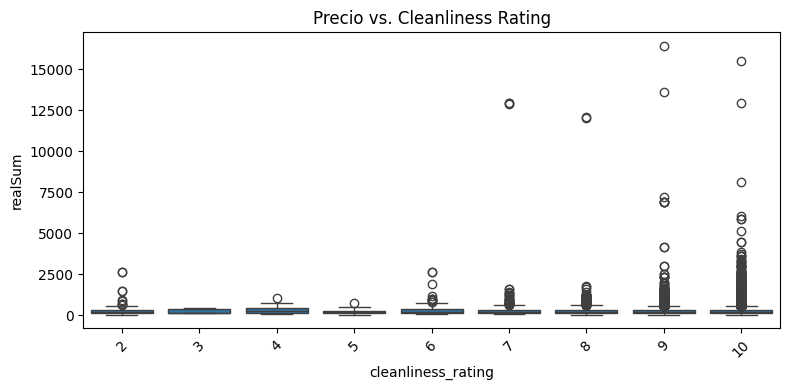

In [7]:
for rating in ["guest_satisfaction_overall", "cleanliness_rating"]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=rating, y="realSum", data=train)
    plt.title(f"Precio vs. {rating.replace('_',' ').title()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

[05/05/25 07:32:32] WARNING  C:\Users\George\AppData\Local\Temp\ipykernel_31132\3990899464.py:2:    ]8;id=277096;file://C:\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=670559;file://C:\Python310\lib\warnings.py#109\109]8;;\
                             FutureWarning: The default of observed=False is deprecated and will be                
                             changed to True in a future version of pandas. Pass observed=False to                 
                             retain current behavior or observed=True to adopt the future default                  
                             and silence this warning.                                                             
                               train.groupby("clean_group")["realSum"].mean().plot.bar()                           
                                                                                                                   

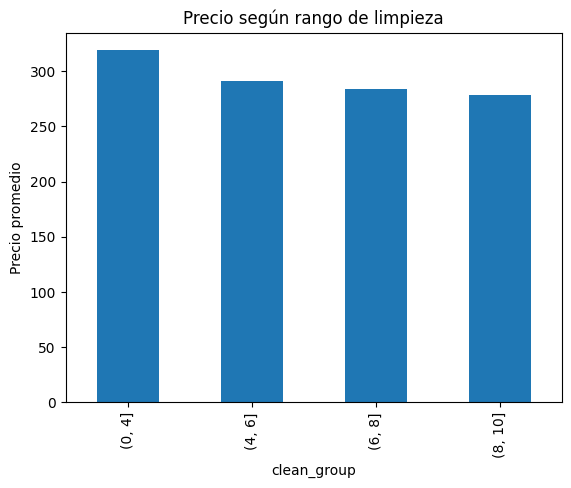

In [8]:
train["clean_group"] = pd.cut(train.cleanliness_rating, bins=[0,4,6,8,10])
train.groupby("clean_group")["realSum"].mean().plot.bar()
plt.ylabel("Precio promedio")
plt.title("Precio según rango de limpieza")
plt.show()

In [9]:
train["quality_index"] = train[["cleanliness_rating","guest_satisfaction_overall"]].mean(axis=1)


# Distribución de la variable objetivo


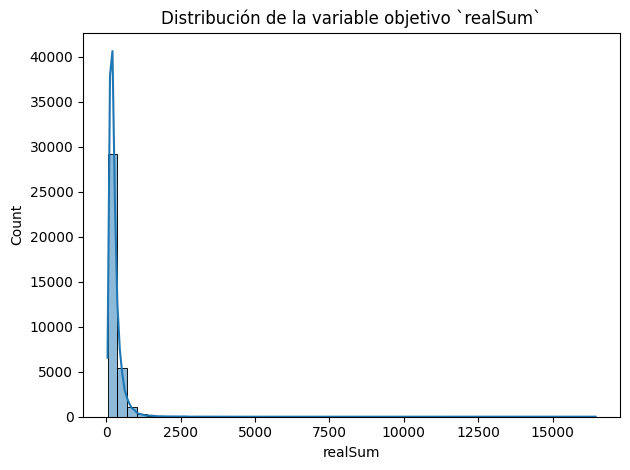

In [10]:
# %%
plt.figure()
sns.histplot(train["realSum"], bins=50, kde=True)
plt.title("Distribución de la variable objetivo `realSum`")
plt.tight_layout()

# ## 6. Cruces con variables categóricas

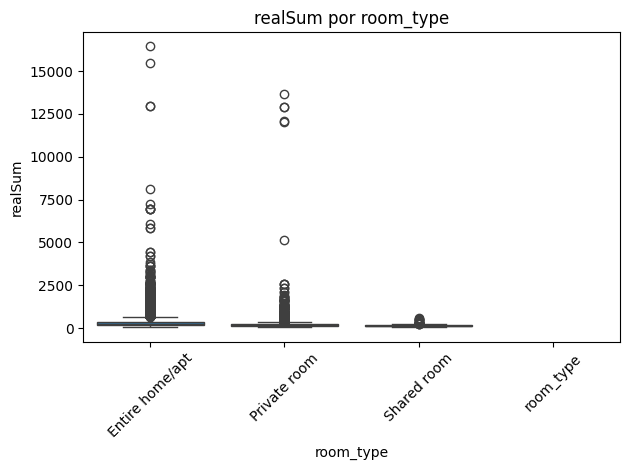

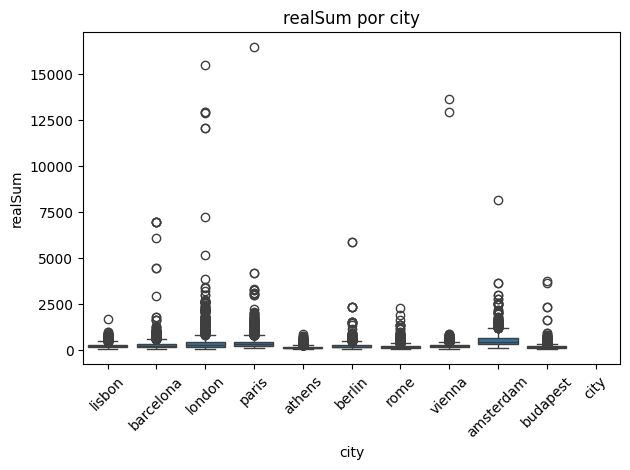

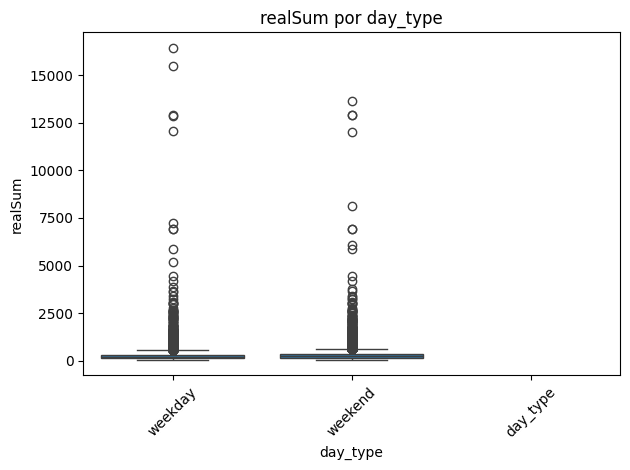

In [11]:
# %%
cat_cols = ["room_type", "city", "day_type"]
for col in cat_cols:
    plt.figure()
    sns.boxplot(x=col, y="realSum", data=train)
    plt.title(f"realSum por {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

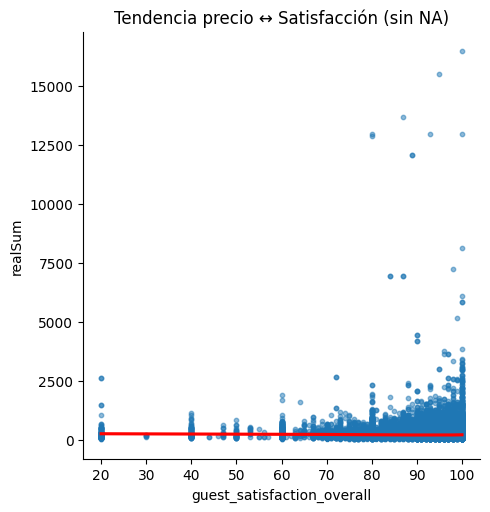

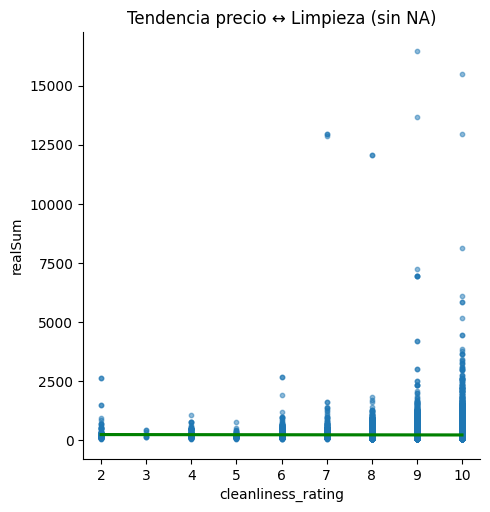

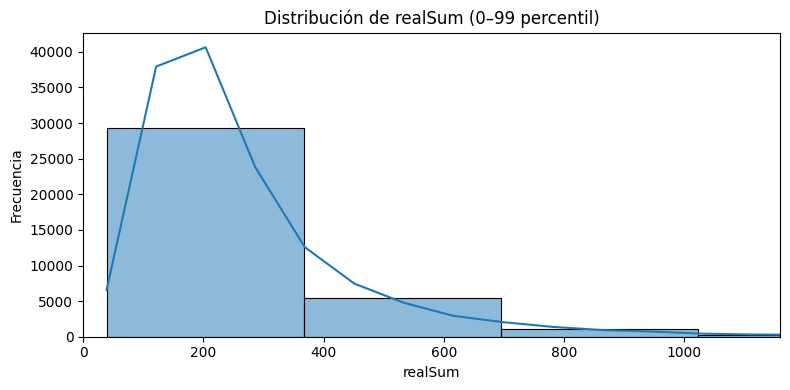

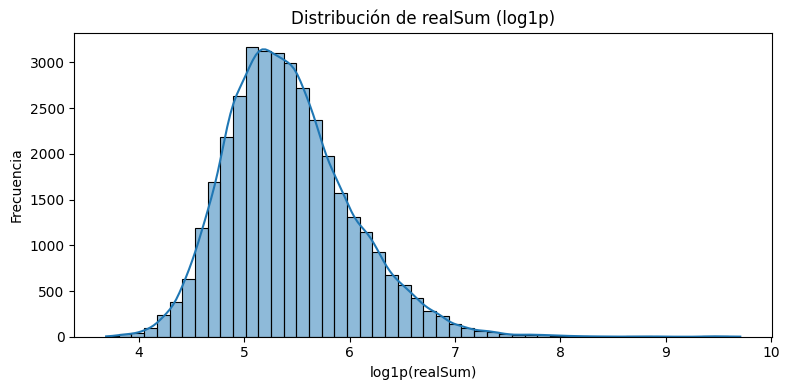

In [12]:
# %% 3.5 Tendencia precio ↔ ratings y ajuste distribución realSum

import numpy as np

# 1) lmplot sin NA para guest_satisfaction_overall
df_satis = train[["guest_satisfaction_overall", "realSum"]].dropna()
sns.lmplot(
    x="guest_satisfaction_overall",
    y="realSum",
    data=df_satis,
    lowess=True,
    scatter_kws={"s": 10, "alpha": 0.5},
    line_kws={"color": "red"},
)
plt.title("Tendencia precio ↔ Satisfacción (sin NA)")
plt.show()

# 2) lmplot sin NA para cleanliness_rating
df_clean = train[["cleanliness_rating", "realSum"]].dropna()
sns.lmplot(
    x="cleanliness_rating",
    y="realSum",
    data=df_clean,
    lowess=True,
    scatter_kws={"s": 10, "alpha": 0.5},
    line_kws={"color": "green"},
)
plt.title("Tendencia precio ↔ Limpieza (sin NA)")
plt.show()

# 3) Ajustar histograma de realSum al rango 0–percentil 99
p99 = train["realSum"].quantile(0.99)
plt.figure(figsize=(8,4))
sns.histplot(train["realSum"], bins=50, kde=True)
plt.xlim(0, p99)
plt.title("Distribución de realSum (0–99 percentil)")
plt.xlabel("realSum")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 4) (Opcional) Histograma en escala logarítmica
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(train["realSum"]), bins=50, kde=True)
plt.title("Distribución de realSum (log1p)")
plt.xlabel("log1p(realSum)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



# ## 5. Siguiente pasos de preprocesamiento

In [13]:
# %% 5. Preprocesamiento depurado: imputación, codificación, escalado y split

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 5.1. Carga de datos y separación inicial
# ----------------------------------------
# Train ya está cargado en `train`
X = train.drop(["id", "realSum"], axis=1).copy()
y = train["realSum"].astype(float)

# Carga test y quita id
test_df = pd.read_csv("data/01_raw/Test.csv", low_memory=False)
X_test = test_df.drop(["id"], axis=1).copy()

# 5.2. Define qué columnas van dónde
# -----------------------------------
num_cols = [
    "person_capacity", "multi", "biz", "cleanliness_rating",
    "guest_satisfaction_overall", "bedrooms",
    "dist", "metro_dist", "lng", "lat"
]
cat_cols = [
    "room_type", "room_shared", "room_private",
    "host_is_superhost", "city", "day_type"
]

# 5.3. Forzar dtypes
# ------------------
# Categóricas → str; Numéricas → float
X[cat_cols]       = X[cat_cols].astype(str)
X[num_cols]       = X[num_cols].astype(float)
X_test[cat_cols]  = X_test[cat_cols].astype(str)
X_test[num_cols]  = X_test[num_cols].astype(float)

# 5.4. Monta los pipelines
# ------------------------
numeric_transformer = Pipeline(
    [("scaler", StandardScaler())]
)
categorical_transformer = Pipeline(
    [("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    # Fuerza salida densa aunque OHE devuelva sparse
    sparse_threshold=0
)

# 5.5. Split train/validation
# ----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5.6. Ajusta el preprocessor y transforma
# -----------------------------------------
X_train_proc = preprocessor.fit_transform(X_train)
X_valid_proc = preprocessor.transform(X_valid)
X_test_proc  = preprocessor.transform(X_test)

print("Shapes después del preprocesado:")
print("  X_train_proc:", X_train_proc.shape)
print("  X_valid_proc:", X_valid_proc.shape)
print("  X_test_proc: ", X_test_proc.shape)


[05/05/25 07:32:34] WARNING  C:\Users\George\Documents\GitHub\ML-Models-UFM-2025-Airbnb-Pricing-com ]8;id=395446;file://C:\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=584970;file://C:\Python310\lib\warnings.py#109\109]8;;\
                             petition\proyect3\lib\site-packages\sklearn\preprocessing\_encoders.py                
                             :246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4,                
                             5] during transform. These unknown categories will be encoded as all                  
                             zeros                                                                                 
                               warnings.warn(                                                                      
                                                                                                                   

Shapes después del preprocesado:
  X_train_proc: (28956, 25)
  X_valid_proc: (7239, 25)
  X_test_proc:  (15513, 25)


In [20]:
# %% Mostrar data preprocesada

import pandas as pd

# Recuperar nombres de las columnas tras el ColumnTransformer
feature_names = preprocessor.get_feature_names_out()


# %% 5.x. Imputación + PCA (opcional)
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# 1) Detectar NaNs en X_train_proc y X_test_proc
print("NaNs en X_train_proc:", np.isnan(X_train_proc).sum())
print("NaNs en X_test_proc: ", np.isnan(X_test_proc).sum())

# 2) Imputar con la media (solo si encuentras NaNs)
imputer = SimpleImputer(strategy="mean")
X_train_imp = imputer.fit_transform(X_train_proc)
X_test_imp  = imputer.transform(X_test_proc)

# 3) PCA al 95% de varianza
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_imp)
X_test_pca  = pca.transform(X_test_imp)
print(f"✅ Componentes para 95% varianza: {pca.n_components_}")

# A partir de aquí usarías X_train_pca/X_test_pca en lugar de X_train_proc/X_test_proc

# Convertir los arrays de numpy a DataFrame para visualización
X_train_df = pd.DataFrame(X_train_proc, columns=feature_names)
X_valid_df = pd.DataFrame(X_valid_proc, columns=feature_names)

print("➤ X_train preprocesado:")
print("  Shape:", X_train_df.shape)
print(X_train_df.head(), "\n")

print("➤ X_valid preprocesado:")
print("  Shape:", X_valid_df.shape)
print(X_valid_df.head())

NaNs en X_train_proc: 0
NaNs en X_test_proc:  0
✅ Componentes para 95% varianza: 13
➤ X_train preprocesado:
  Shape: (28956, 25)
   num__person_capacity  num__multi  num__biz  num__cleanliness_rating  \
0             -0.895000    1.555202 -0.730761                 0.639890   
1             -0.895000    1.555202 -0.730761                 0.639890   
2             -0.895000    1.555202 -0.730761                 0.639890   
3              0.647688   -0.643003 -0.730761                -2.497548   
4             -0.895000   -0.643003  1.368437                -1.451735   

   num__guest_satisfaction_overall  num__bedrooms  num__dist  num__metro_dist  \
0                         0.046780      -0.250715   0.239668         0.183547   
1                         0.494348      -1.833040  -0.239904         0.588869   
2                         0.494348      -0.250715  -0.068774        -0.697043   
3                        -1.407815      -0.250715   0.070083        -0.493773   
4                    

In [21]:
# %% CodeCell: Convertir arrays preprocesados en DataFrames para explorar   
import pandas as pd

# Asumiendo que `preprocessor`, `X_train_proc` y `X_valid_proc` ya están en memoria
# y que `preprocessor` es tu ColumnTransformer de la celda 5.

cols = preprocessor.get_feature_names_out()
train_df = pd.DataFrame(X_train_proc, columns=cols)
valid_df = pd.DataFrame(X_valid_proc, columns=cols)

print("▶️ Primeras 5 filas de X_train_proc como DataFrame")
display(train_df.head())

print("▶️ Primeras 5 filas de X_valid_proc como DataFrame")
display(valid_df.head())


▶️ Primeras 5 filas de X_train_proc como DataFrame


,num__person_capacity,num__multi,num__biz,num__cleanliness_rating,num__guest_satisfaction_overall,num__bedrooms,num__dist,num__metro_dist,num__lng,num__lat,...,cat__city_athens,cat__city_barcelona,cat__city_berlin,cat__city_budapest,cat__city_lisbon,cat__city_london,cat__city_paris,cat__city_rome,cat__city_vienna,cat__day_type_weekend
0,-0.895000,1.555202,-0.730761,0.639890,0.046780,-0.250715,0.239668,0.183547,-0.759056,1.114551,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.895000,1.555202,-0.730761,0.639890,0.494348,-1.833040,-0.239904,0.588869,1.669102,-1.460436,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.895000,1.555202,-0.730761,0.639890,0.494348,-0.250715,-0.068774,-0.697043,-0.768211,1.118566,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.647688,-0.643003,-0.730761,-2.497548,-1.407815,-0.250715,0.070083,-0.493773,-0.516253,0.609567,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.895000,-0.643003,1.368437,-1.451735,-0.960247,-0.250715,-0.971941,-0.078900,-0.530183,-0.812372,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


▶️ Primeras 5 filas de X_valid_proc como DataFrame


,num__person_capacity,num__multi,num__biz,num__cleanliness_rating,num__guest_satisfaction_overall,num__bedrooms,num__dist,num__metro_dist,num__lng,num__lat,...,cat__city_athens,cat__city_barcelona,cat__city_berlin,cat__city_budapest,cat__city_lisbon,cat__city_london,cat__city_paris,cat__city_rome,cat__city_vienna,cat__day_type_weekend
0,-0.895000,-0.643003,-0.730761,0.639890,0.606240,-0.250715,-0.639515,-0.754082,-0.251284,1.278494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.895000,-0.643003,-0.730761,-0.405922,0.382456,-0.250715,-0.595282,1.223645,-0.255339,1.280243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.895000,1.555202,-0.730761,0.639890,-0.288896,-0.250715,-0.490080,-0.444880,1.193149,0.350452,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.895000,-0.643003,1.368437,0.639890,0.830023,-0.250715,2.185485,0.494934,-0.752195,1.116862,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.647688,1.555202,-0.730761,0.639890,-0.288896,1.331610,-0.499774,-0.520118,-0.512590,0.613504,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [22]:
# %%  ••• Guardar datasets preprocesados a CSV •••

import os

# Crea la carpeta si no existe
os.makedirs("data/02_intermediate", exist_ok=True)

# Convertir X_train_proc y X_valid_proc en DataFrames (ya lo hicimos antes)
cols = preprocessor.get_feature_names_out()
train_df = pd.DataFrame(X_train_proc, index=X_train.index, columns=cols)
valid_df = pd.DataFrame(X_valid_proc, index=X_valid.index, columns=cols)

# Añadir la columna realSum (y) y el id original
train_df["realSum"] = y_train.values
train_df = train_df.reset_index().rename(columns={"index": "id"})
valid_df["realSum"] = y_valid.values
valid_df = valid_df.reset_index().rename(columns={"index": "id"})

# Guardar
train_df.to_csv("data/02_intermediate/train_processed.csv", index=False)
valid_df.to_csv("data/02_intermediate/valid_processed.csv", index=False)

print("✅ Datos preprocesados guardados en data/02_intermediate/")


✅ Datos preprocesados guardados en data/02_intermediate/
